In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime
import seaborn
%matplotlib inline

In [3]:
fitbit_intrad = pd.read_csv('../data/fitbit_intraday.csv', encoding='utf-8')
fitbit_intrad.drop(['Unnamed: 0'], axis=1, inplace=True)
fitbit_intrad

,date,time,steps,minutesVeryActive,minutesFairlyActive,minutesLightlyActive,minutesSedentary,elevation,floors,distance,calories,heart
0,2023-10-22,00:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN
1,2023-10-22,00:01:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN
2,2023-10-22,00:02:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN
3,2023-10-22,00:03:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN
4,2023-10-22,00:04:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2023-10-30,23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12956,2023-10-30,23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12957,2023-10-30,23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12958,2023-10-30,23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fitbit_intrad['date'] = pd.to_datetime(fitbit_intrad['date'])
fitbit_intrad['dow'] = fitbit_intrad['date'].dt.weekday
fitbit_intrad

,date,time,steps,minutesVeryActive,minutesFairlyActive,minutesLightlyActive,minutesSedentary,elevation,floors,distance,calories,heart,dow
0,2023-10-22,00:00:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN,6
1,2023-10-22,00:01:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN,6
2,2023-10-22,00:02:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN,6
3,2023-10-22,00:03:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN,6
4,2023-10-22,00:04:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1798,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2023-10-30,23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12956,2023-10-30,23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12957,2023-10-30,23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12958,2023-10-30,23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Steps chart
fitbit_intrad.groupby('date').sum()['steps']

date
2023-10-22      145.0
2023-10-23     3656.0
2023-10-24     3228.0
2023-10-25     1597.0
2023-10-26     9776.0
2023-10-27    17740.0
2023-10-28    37123.0
2023-10-29    25293.0
2023-10-30      628.0
Name: steps, dtype: float64

Text(0.5, 0, '')

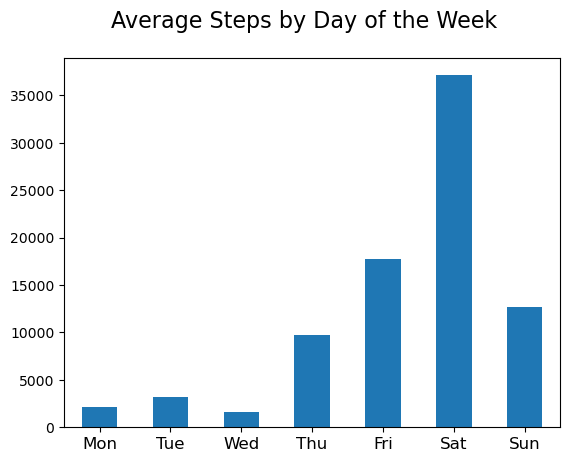

In [17]:
fitbit_intrad[['date', 'steps', 'dow']].groupby(['date']).sum().groupby(['dow'])['steps'].mean().plot(kind='bar', x='day_of_week')
plt.suptitle('Average Steps by Day of the Week', fontsize=16)
plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), rotation=0, fontsize=12)
plt.xlabel("")
# plt.xlabel('Day of Week: 0 = Monday, 6 = Sunday', fontsize=12, color='red')

<Axes: >

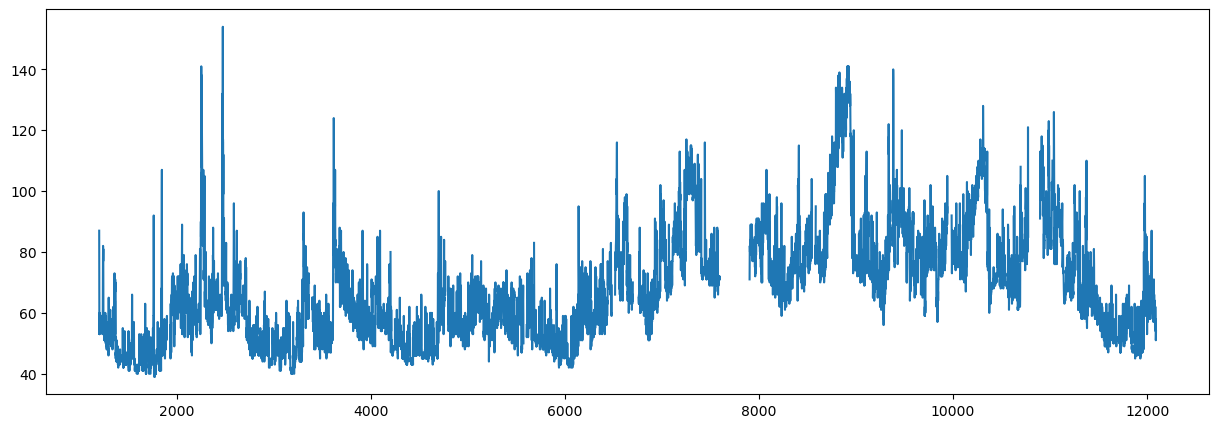

In [20]:
fitbit_intrad['heart'].plot(kind='line', figsize=(15, 5))